# Spam detector 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

from wordcloud import WordCloud

## Get the Data 

In [3]:
#https://www.kaggle.com/uciml/sms-spam-collection-dataset
url='https://drive.google.com/file/d/1b5p4CJMDpOzkmQIi5Jk9PLxD8reHzj6S/view?usp=sharing'
url_='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url_)

In [4]:
df.shape

(5572, 2)

In [5]:
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [6]:
df.columns

Index(['text', 'target'], dtype='object')

In [7]:
from collections import Counter
Counter( df['target'])

Counter({'ham': 4825, 'spam': 747})

## Visualization 

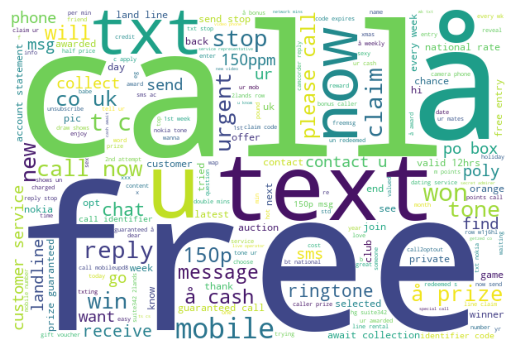

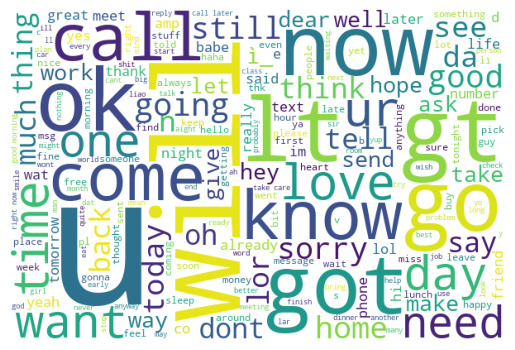

In [8]:
def visualize(label):
    text = ''
    for msg in df[df['target'] == label]['text']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualize('spam')
visualize('ham')

## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.20)

In [10]:
print(X_train.shape, y_train.shape)

(4457,) (4457,)


## Vectorization

In [11]:
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

## Model

In [12]:
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_transformed, y_train)
y_pred = clf.predict(X_test_transformed)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.97      0.93      0.95       149

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [14]:
print(confusion_matrix(y_test, y_pred))

[[962   4]
 [ 10 139]]
